# Instalando as dependências usadas no projetos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [9]:
df = pd.read_csv('/Users/mile/Documents/Projetos/estudo-data-viz-com-python/data/valorant-stats.csv')
df.head(10)

,Name,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
0,Classic,Sidearm,0,6.75,Low,12,78,26,22,78,26,22,66,22,18
1,Shorty,Sidearm,200,3.30,Low,2,36,12,10,24,8,6,9,3,2
2,Frenzy,Sidearm,400,10.00,Low,13,78,26,22,63,21,17,63,21,17
3,Ghost,Sidearm,500,6.75,Medium,15,105,33,26,88,25,21,88,25,21
4,Sheriff,Sidearm,800,4.00,High,6,160,55,47,160,55,47,145,50,43
5,Stinger,SMG,1000,18.00,Low,20,67,27,23,62,25,21,62,25,21
6,Spectre,SMG,1600,13.33,Medium,30,78,26,22,66,22,18,66,22,18
7,Bulldog,Rifle,2100,9.15,Medium,24,116,35,30,116,35,30,116,35,30
8,Guardian,Rifle,2500,6.50,Medium,12,195,65,49,195,65,49,195,65,49
9,Phantom,Rifle,2900,11.00,Medium,30,156,39,33,140,35,30,124,31,26


# Traduzindo os valores para português

In [ ]:
traducao_colunas = {
    'Name': 'Nome',
    'Weapon Type': 'Tipo da Arma',
    'Price': 'Preço',
    'Fire Rate': 'Taxa de Disparo',
    'Wall Penetration': 'Penetração de Parede',
    'Magazine Capacity': 'Capacidade do Carregador'}

df = df.rename(columns=traducao_colunas)

# Verificando se mudou
traducoes_especificas = {
    # Para a coluna 'Tipo da Arma'
    'Sidearm': 'Pistola',
    'SMG': 'Submetralhadora',
    'Rifle': 'Fuzil',
    'Shotgun': 'Escopeta',
    'Sniper': 'Snipers',
    'Heavy': 'Pesada',
    
    # Para a coluna 'Penetração de Parede'
    'Low': 'Baixa',
    'Medium': 'Média',
    'High': 'Alta'
}

colunas_alvo = ['Tipo da Arma', 'Penetração de Parede']

df[colunas_alvo] = df[colunas_alvo].replace(traducoes_especificas)

# Visualizando o resultado
df.head()

,Nome,Tipo da Arma,Preço,Taxa de Disparo,Penetração de Parede,Capacidade do Carregador,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
0,Classic,Pistola,0,6.75,Baixa,12,78,26,22,78,26,22,66,22,18
1,Shorty,Pistola,200,3.30,Baixa,2,36,12,10,24,8,6,9,3,2
2,Frenzy,Pistola,400,10.00,Baixa,13,78,26,22,63,21,17,63,21,17
3,Ghost,Pistola,500,6.75,Média,15,105,33,26,88,25,21,88,25,21
4,Sheriff,Pistola,800,4.00,Alta,6,160,55,47,160,55,47,145,50,43


# Testando as visualizacoes


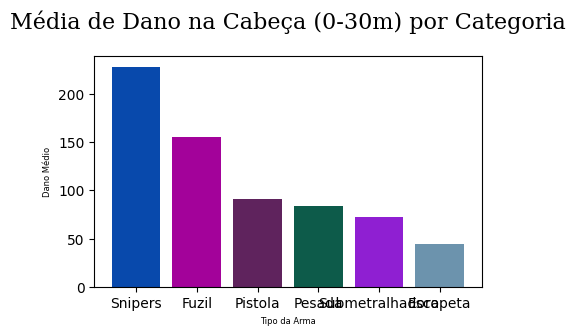

In [49]:
# 1. Preparação dos Dados (Sempre primeiro)
dano_por_tipo = df.groupby('Tipo da Arma')['HDMG_0'].mean()
dano_por_tipo = dano_por_tipo.sort_values(ascending=False)

# 2. Configuração da Tela (Tem que ser ANTES do plt.bar)
plt.figure(figsize=(5, 3))

# 3. Desenho do Gráfico
plt.bar(dano_por_tipo.index, dano_por_tipo.values, color=np.random.rand(len(dano_por_tipo),3))

# 4. Estilização (Títulos e Eixos)
plt.title('Média de Dano na Cabeça (0-30m) por Categoria', 
          fontsize=16, 
          fontweight='light',
          fontfamily='serif',
          pad=20)

plt.xlabel('Tipo da Arma', fontsize=6)
plt.ylabel('Dano Médio', fontsize=6)

# 5. Exibição
plt.show()

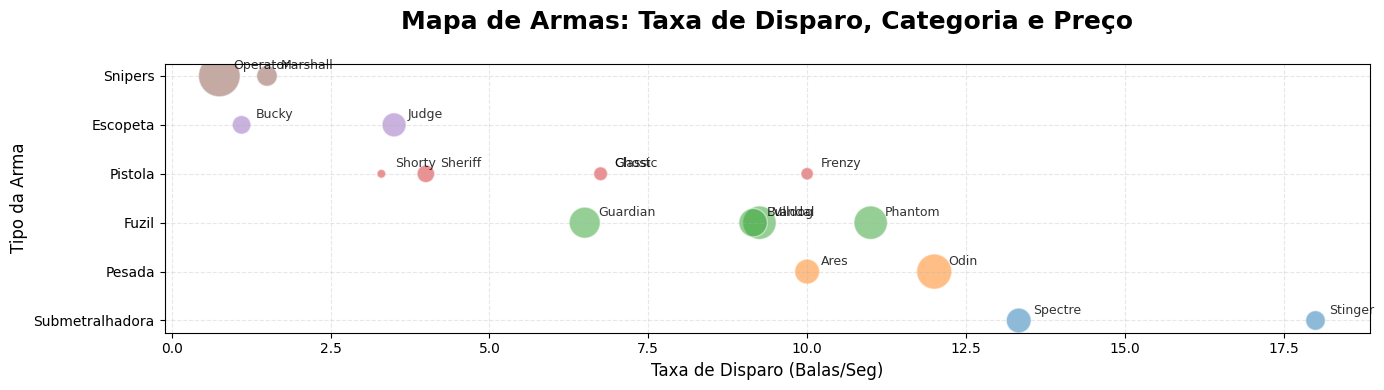

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_plot = df.sort_values(by='Taxa de Disparo', ascending=False)
plt.figure(figsize=(14, 4))

tipos = df_plot['Tipo da Arma'].unique()

for tipo in tipos:
    dados_categoria = df_plot[df_plot['Tipo da Arma'] == tipo]
    
    # Desenha os círculos
    plt.scatter(
        dados_categoria['Taxa de Disparo'], 
        dados_categoria['Tipo da Arma'], 
        label=tipo,
        s=dados_categoria['Preço'] / 5, 
        alpha=0.5, 
        edgecolors='white'
    )

    for i in range(len(dados_categoria)):
        plt.annotate(
            dados_categoria.iloc[i]['Nome'], # O texto que vai aparecer
            (dados_categoria.iloc[i]['Taxa de Disparo'], dados_categoria.iloc[i]['Tipo da Arma']), # Coordenada (x, y)
            xytext=(20, 5),              # Deslocamento do texto (5 pixels para o lado e para cima)
            textcoords='offset points', # Indica que o deslocamento é em pixels
            fontsize=9,                 # Tamanho da fonte do Nome
            alpha=0.8                   # Opacidade do texto
        )

# Estilização
plt.title('Mapa de Armas: Taxa de Disparo, Categoria e Preço', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Taxa de Disparo (Balas/Seg)', fontsize=12)
plt.ylabel('Tipo da Arma', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()